# Explore here

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [5]:
# 0.1 - Cargamos el dataframe
url = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"
df = pd.read_csv(url, delimiter=",")  
df.to_csv("/workspaces/Jacinto-Proyecto-Tutorial-de-Mejorando-Algoritmos/src/diabetes.csv", index=False)

## 0 - Cargar de datos y revisión General

In [6]:
# 0.2 - Revisamos las primeras filas del dataframe
df.head() 

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [7]:
# 0.3 - Vemos las dimensiones en filas y columnas del dataframe
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

El dataset tiene 768 filas y 9 columnas.


In [8]:
# 0.4 - Vemos un resumen detallado del dataframe para conocer el tipo de variables
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [9]:
# 0.5 - Observamos los valores unicos de cada columna del df
n_unicos = df.nunique()
n_unicos.sort_values(ascending=False)
n_unicos

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [10]:
# 0.6 - Eliminar columnas con valores constantes

# Identificar columnas con un solo valor único
cols_constantes = df.nunique()[df.nunique() == 1].index

# Eliminar estas columnas del DataFrame
if len(cols_constantes) > 0:
    df = df.drop(columns=cols_constantes)
    print(f"Columnas eliminadas: {cols_constantes}")
else:
    print("No se encontraron columnas constantes.")

No se encontraron columnas constantes.


In [11]:
# 0.7 - Comprobar la presencia de filas duplicadas
duplicados = df.duplicated().sum()
print(f"Filas duplicadas encontradas: {duplicados}")

if duplicados > 0:
    df = df.drop_duplicates()
    print(f"Se eliminaron {duplicados} duplicados. Tamaño final: {df.shape}")


Filas duplicadas encontradas: 0


## 1 - Distribución de las variables y relación entre variables.

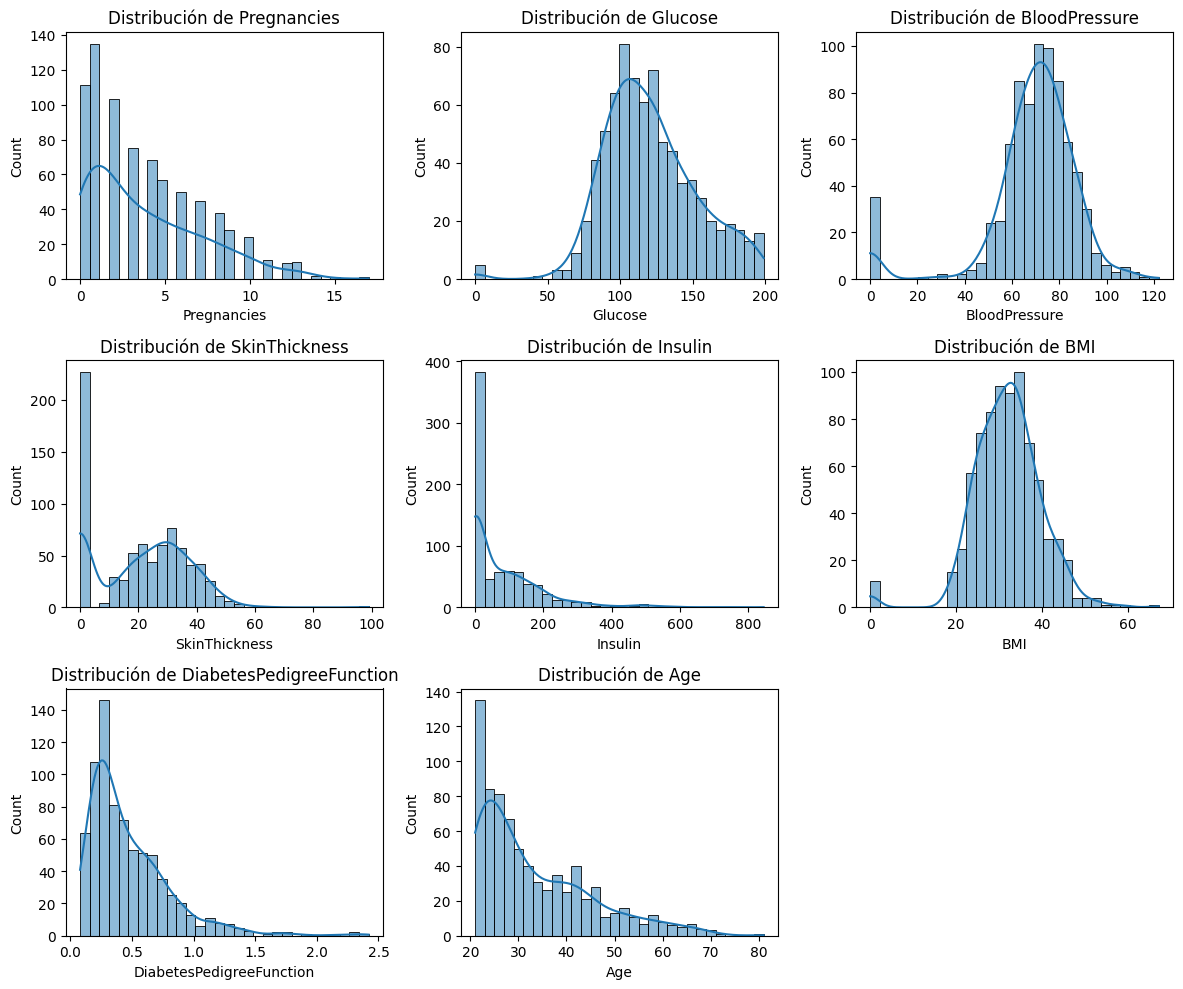

In [12]:
# 1.1 - Visualización de la distribución de las variables numéricas

columnas_numericas = df.columns[:-1]  # Excluimos la variable objetivo "Outcome"

plt.figure(figsize=(12, 10))
for i, columna in enumerate(columnas_numericas, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[columna], kde=True, bins=30)
    plt.title(f'Distribución de {columna}')
plt.tight_layout()
plt.show()



In [13]:
# 1.2 - Boxplots para detectar valores atípicos
plt.figure(figsize=(12, 10))
for i, columna in enumerate(columnas_numericas, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[columna])
    plt.title(f'Boxplot de {columna}')
plt.tight_layout()
plt.show()

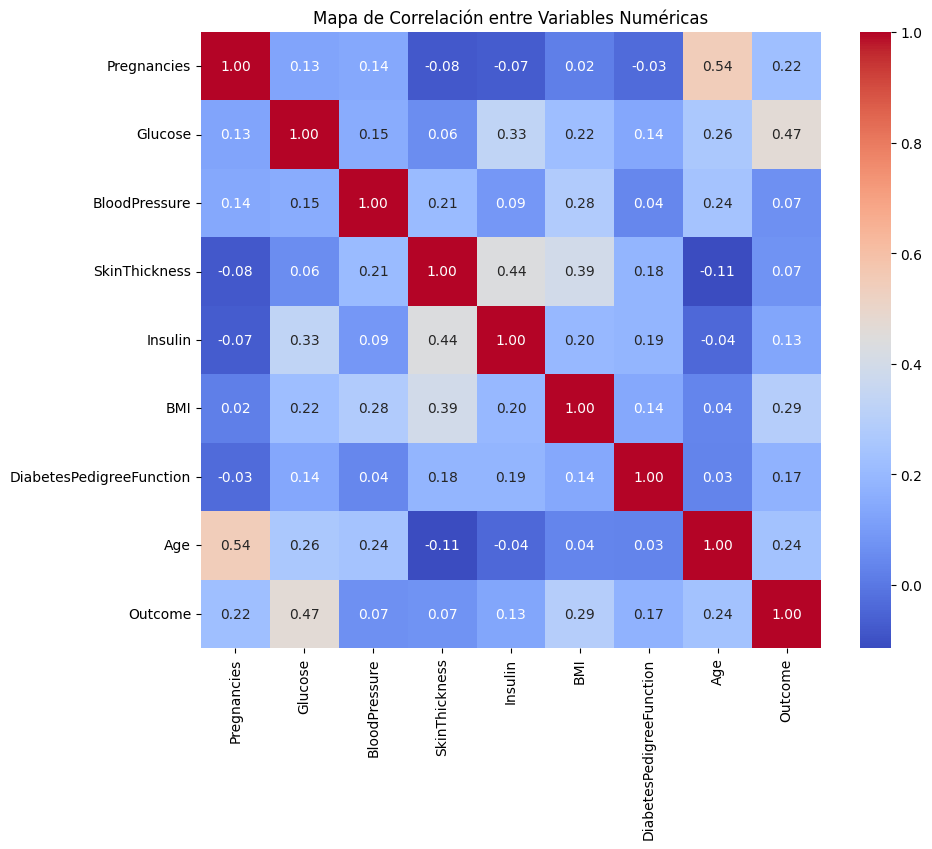

In [14]:
# 1.3 – Mapa de calor de correlación entre variables
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Correlación entre Variables Numéricas")
plt.show()

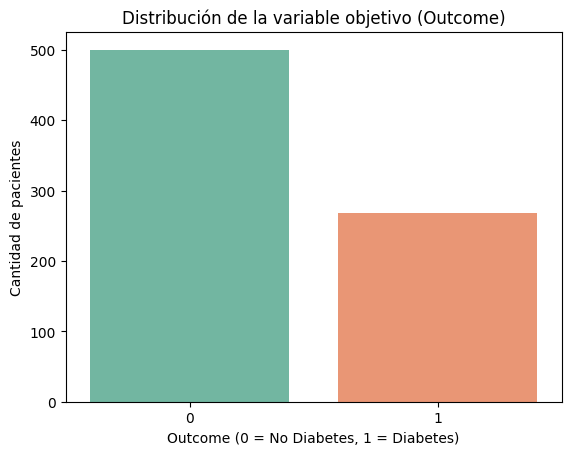

In [15]:
# 1.4 – Distribución de la variable objetivo
sns.countplot(data=df, x="Outcome", hue="Outcome", palette="Set2", legend=False)
plt.title("Distribución de la variable objetivo (Outcome)")
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.ylabel("Cantidad de pacientes")
plt.show()

## 2 - Limpieza de Datos

2.1 – Eliminación de valores atípicos con el método IQR

In [16]:
def eliminar_outliers(df, columnas):
    for columna in columnas:
        Q1 = df[columna].quantile(0.25)
        Q3 = df[columna].quantile(0.75)
        IQR = Q3 - Q1
        filtro = (df[columna] >= Q1 - 1.5 * IQR) & (df[columna] <= Q3 + 1.5 * IQR)
        df = df[filtro]
    return df

columnas_numericas = df.columns[df.dtypes != "object"]
df = eliminar_outliers(df, columnas_numericas.drop("Outcome"))

print(f"Después de eliminar outliers, el dataset tiene {df.shape[0]} filas.")

Después de eliminar outliers, el dataset tiene 636 filas.


## 3 - Partición del Dataset en Train/Test

3.1 – Separar características (X) y variable objetivo (y)


In [17]:
X = df.drop(columns=["Outcome"])  # Variables predictoras
y = df["Outcome"]  # Variable objetivo

3.2 – Dividir en entrenamiento y prueba (80/20)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y  # mantiene balance de clases en train y test
)

print(f"Conjunto de entrenamiento: {X_train.shape}")
print(f"Conjunto de prueba: {X_test.shape}")

Conjunto de entrenamiento: (508, 8)
Conjunto de prueba: (128, 8)


## Punto 4 – Construcción de árboles de decisión

4.1 – Árbol de Decisión SIMPLE

In [19]:
# Árbol de baja complejidad
modelo_simple = DecisionTreeClassifier(max_depth=3, random_state=42)
modelo_simple.fit(X_train, y_train)

# Predicción y evaluación
y_pred_simple = modelo_simple.predict(X_test)
print("Árbol de Decisión SIMPLE")
print(f"Precisión: {accuracy_score(y_test, y_pred_simple):.2f}")
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_simple))

Árbol de Decisión SIMPLE
Precisión: 0.76
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.76      0.95      0.84        88
           1       0.76      0.33      0.46        40

    accuracy                           0.76       128
   macro avg       0.76      0.64      0.65       128
weighted avg       0.76      0.76      0.72       128



**Explicacion de resultados:**

Precisión global del modelo: 0.76
El modelo acierta en el 76 % de los casos. A primera vista, parece un rendimiento razonable, pero veamos cómo se comporta específicamente con cada clase.

Clase 0 – No Diabetes
Precision 0.76 → De todas las veces que el modelo predijo "No Diabetes", acertó el 76 % de ellas.

Recall 0.95 → De los pacientes realmente sanos, el 95 % fueron bien clasificados.

Muy buen rendimiento en esta clase, poco margen de error.

Clase 1 – Diabetes
Precision 0.76 → Cuando predijo “Diabetes”, lo hizo bastante bien (igual que la otra clase).

Recall 0.33 → Solo detectó correctamente al 33 % de los pacientes diabéticos.

Aquí hay un problema serio: el modelo falla en 2 de cada 3 casos reales de diabetes.

**Conclusión:**

Este árbol es demasiado conservador: favorece la clase mayoritaria (No Diabetes), y apenas logra detectar correctamente casos reales de diabetes.

Esto puede deberse a:

Profundidad limitada (max_depth=3) → el modelo no puede explorar reglas más complejas.

Desbalance de clases → hay más pacientes sanos que diabéticos.

Falta de ajuste fino en los parámetros del modelo.

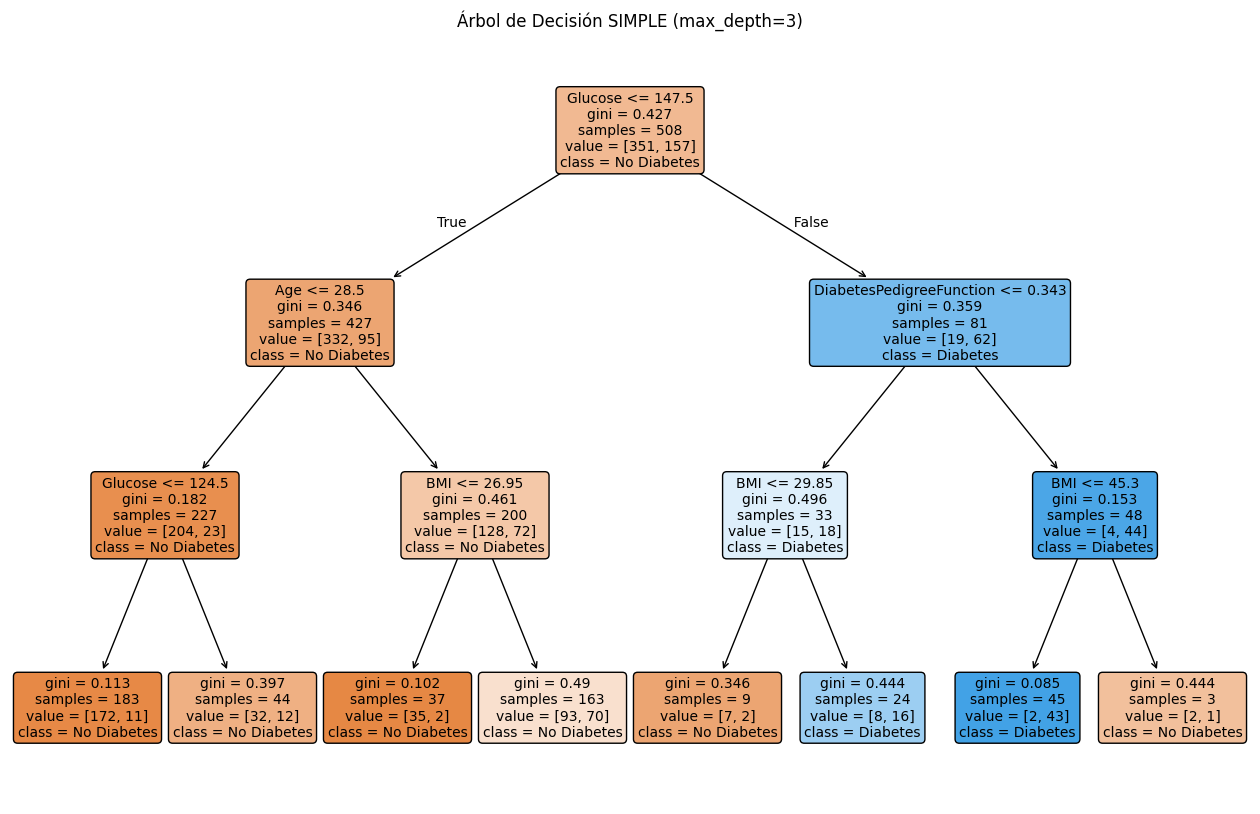

In [20]:
#Visualización del arbol simple

plt.figure(figsize=(16, 10))
plot_tree(modelo_simple,
          filled=True,
          rounded=True,
          feature_names=X_train.columns,
          class_names=["No Diabetes", "Diabetes"],
          fontsize=10)
plt.title("Árbol de Decisión SIMPLE (max_depth=3)")
plt.show()

4.2 – Árbol de Decisión COMPLEJO (ajustado manualmente)

In [21]:
# Árbol más profundo y ajustado
modelo_complejo = DecisionTreeClassifier(
    criterion="gini",
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features="sqrt",
    class_weight="balanced",
    random_state=42
)

modelo_complejo.fit(X_train, y_train)
y_pred_complejo = modelo_complejo.predict(X_test)

print("Árbol de Decisión COMPLEJO")
print(f"Precisión: {accuracy_score(y_test, y_pred_complejo):.2f}")
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_complejo))

Árbol de Decisión COMPLEJO
Precisión: 0.59
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.75      0.60      0.67        88
           1       0.39      0.55      0.45        40

    accuracy                           0.59       128
   macro avg       0.57      0.58      0.56       128
weighted avg       0.63      0.59      0.60       128



**Explicacion de resultados:**

Precisión global: 0.59
Este modelo clasifica correctamente el 59 % de los pacientes. Es inferior a la del modelo simple (76 %), pero hay más matices que mirar.

Clase 0 – No Diabetes
Precision 0.75: de todas las veces que el modelo dijo "No Diabetes", acertó el 75 %.

Recall 0.60: solo detectó el 60 % de los pacientes realmente sanos (bajó respecto al modelo simple).

Clase 1 – Diabetes
Recall 0.55: gran mejora respecto al modelo simple, que tenía solo 0.33.

Precision 0.39: el modelo comete más falsos positivos (gente sana que predice como diabética).

F1-score 0.45: mejora respecto al 0.46 del árbol simple, aunque sigue bajo.

**Conclusión:**

Este árbol sacrifica precisión general para detectar mejor los casos de diabetes. Esto puede ser útil en un contexto clínico, donde es más importante no dejar pasar casos positivos aunque eso signifique tener algunas falsas alarmas.

Sin embargo, el modelo todavía no está bien equilibrado. Podríamos considerar:
Aplicar SMOTE para balancear clases (más ejemplos de clase 1 sintéticos)
Explorar otros modelos como Random Forest o XGBoost
Realizar una optimización con GridSearchCV, que podría ajustar los hiperparámetros de forma más precisa que lo que hicimos manualmente

Comparación directa con el modelo simple
Métrica	Árbol Simple	Árbol Complejo
Precisión global	0.76	0.59
Recall Clase 1	0.33	0.55 
Recall Clase 0	0.95	0.60 
Falsos negativos	Muy alto en complejo (mejoró clase 1)
Falsos positivos	Aumentaron en clase 0

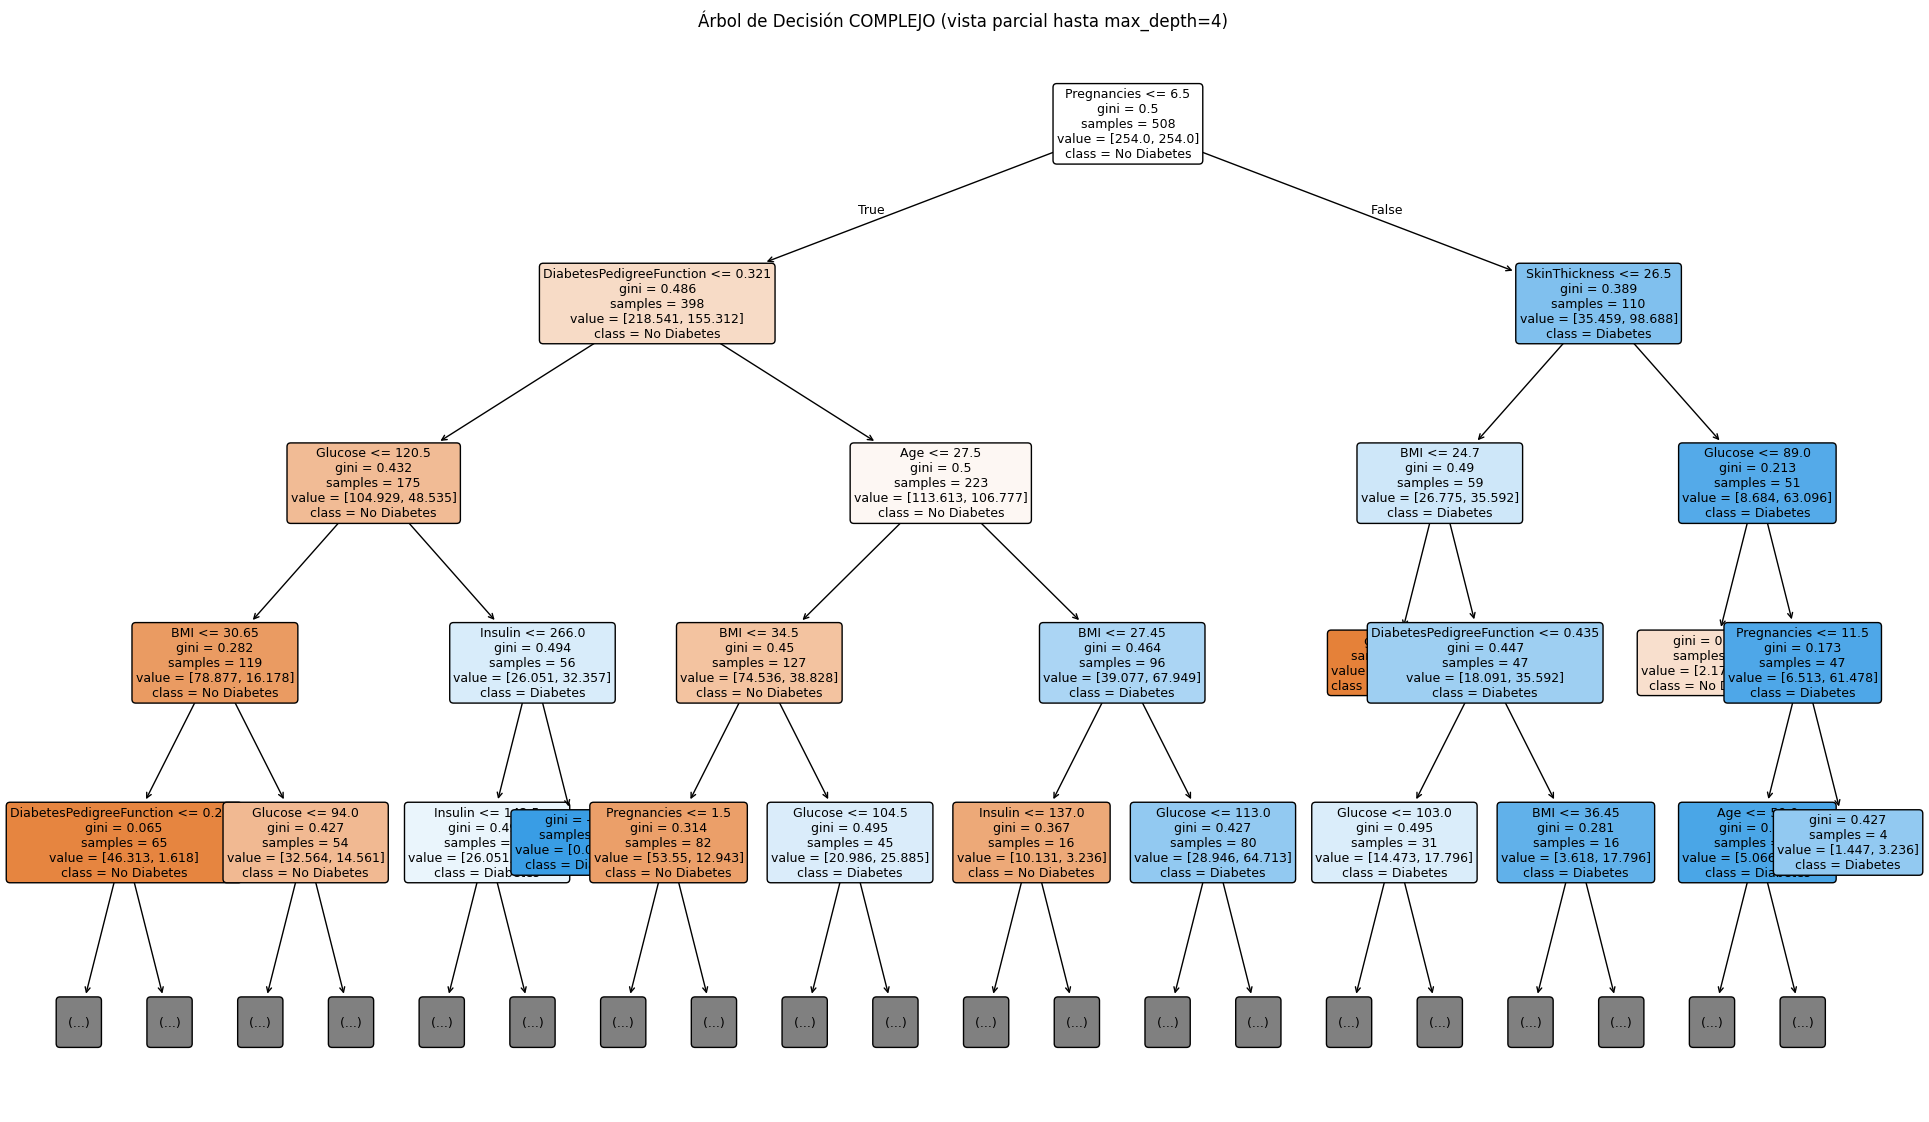

In [22]:
plt.figure(figsize=(24, 14))
plot_tree(modelo_complejo,
          filled=True,
          rounded=True,
          feature_names=X_train.columns,
          class_names=["No Diabetes", "Diabetes"],
          max_depth=4,  # Limitamos visualización si es muy grande
          fontsize=9)
plt.title("Árbol de Decisión COMPLEJO (vista parcial hasta max_depth=4)")
plt.show()

4.3 – Matrices de Confusión de ambos modelos

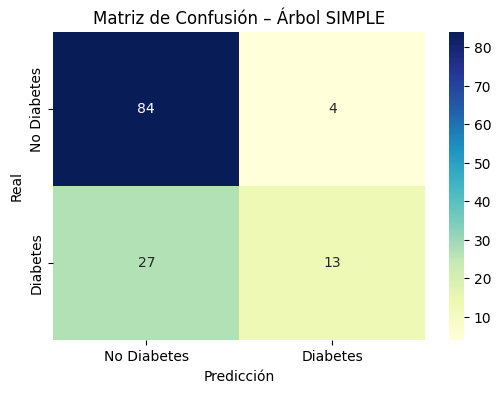

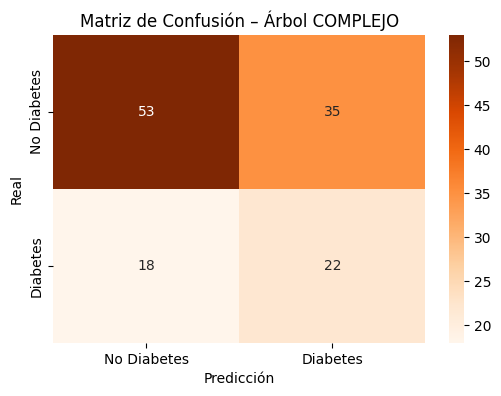

In [23]:
# Árbol simple
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_simple), annot=True, fmt='d', cmap="YlGnBu",
            xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.title("Matriz de Confusión – Árbol SIMPLE")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# Árbol complejo
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_complejo), annot=True, fmt='d', cmap="Oranges",
            xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.title("Matriz de Confusión – Árbol COMPLEJO")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

## 5 – Optimización con GridSearchCV

5.1 – Definir la rejilla de parámetros

In [24]:
# Parámetros a evaluar
parametros = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "max_features": ["sqrt", "log2", None]
}

5.2 – Configurar el GridSearchCV

In [25]:
modelo_base = DecisionTreeClassifier(class_weight="balanced", random_state=42)

grid_search = GridSearchCV(
    estimator=modelo_base,
    param_grid=parametros,
    cv=5,
    scoring="f1",  # o "recall" si priorizas capturar positivos
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

Mejores hiperparámetros encontrados:
{'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}


5.3 – Crear nuevo modelo con los parámetros óptimos

In [26]:
modelo_optimo = grid_search.best_estimator_
modelo_optimo.fit(X_train, y_train)

# Predicción
y_pred_optimo = modelo_optimo.predict(X_test)

5.4 – Evaluación del modelo optimizado

Reporte de clasificación - Modelo Optimizado
              precision    recall  f1-score   support

           0       0.78      0.73      0.75        88
           1       0.48      0.55      0.51        40

    accuracy                           0.67       128
   macro avg       0.63      0.64      0.63       128
weighted avg       0.69      0.67      0.68       128



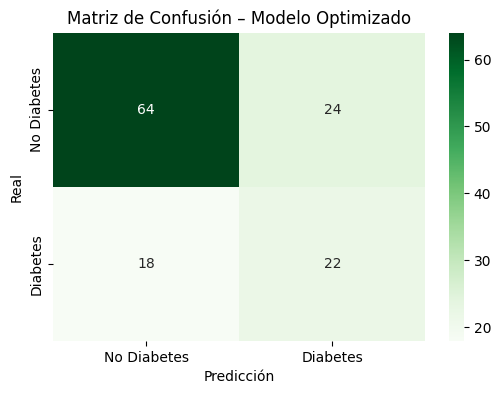

In [27]:
print("Reporte de clasificación - Modelo Optimizado")
print(classification_report(y_test, y_pred_optimo))

# Matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_optimo), annot=True, fmt="d", cmap="Greens",
            xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.title("Matriz de Confusión – Modelo Optimizado")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

**Explicacion de resultados:**

Precisión general: 0.67
El modelo acierta en el 67 % de los casos en el conjunto de prueba. No supera la precisión del árbol simple (0.76), pero como ya sabemos, eso no lo es todo. Lo que importa es cómo trata los casos más delicados: los pacientes con diabetes.

Clase 0 (No Diabetes)
Muy buena precisión (0.78) y un recall del 73 %, lo que indica que el modelo sigue identificando correctamente la mayoría de los pacientes sanos.

Clase 1 (Diabetes)
Recall: 0.55 → Mejora clara frente al árbol simple (recall = 0.33).

Precisión: 0.48 → Casi la mitad de las predicciones de "diabetes" fueron correctas.

Aunque no perfecto, este resultado supera lo obtenido con los árboles anteriores, especialmente en balance.

El optimizado tiene mayor equilibrio entre detectar diabéticos y no caer en tantos errores como el complejo sin ajustar.

**Conclusión:**

Tras aplicar GridSearchCV, encontramos una configuración que equilibra mejor el rendimiento del modelo. Aunque la precisión global se reduce frente al árbol simple, la capacidad para identificar pacientes con diabetes mejora significativamente. Este resultado es clínicamente más útil, ya que prioriza detectar la enfermedad incluso a costa de algún falso positivo.

## 6 – Guardado del modelo entrenado

In [28]:
# Guardar el modelo optimizado
joblib.dump(modelo_optimo, "modelo_arbol_decision_final.pkl")
print("El modelo optimizado ha sido guardado exitosamente.")

El modelo optimizado ha sido guardado exitosamente.


## 7 - Modelo Random Forest - Entrenamiento y Evaluación

Precisión del modelo Random Forest: 0.77

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        88
           1       0.67      0.50      0.57        40

    accuracy                           0.77       128
   macro avg       0.73      0.69      0.71       128
weighted avg       0.76      0.77      0.76       128



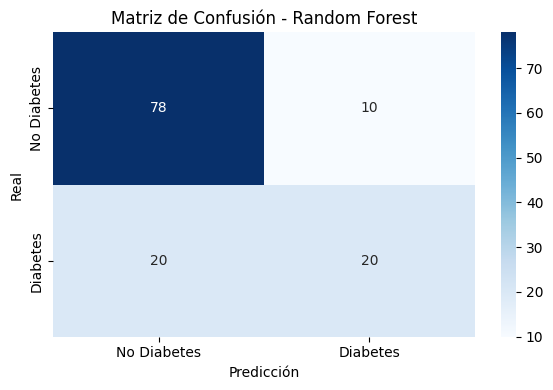

In [29]:
# Entrenar el modelo Random Forest
modelo_rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
modelo_rf.fit(X_train, y_train)

# Predicciones
y_pred_rf = modelo_rf.predict(X_test)

# Evaluación de rendimiento
print(f"Precisión del modelo Random Forest: {accuracy_score(y_test, y_pred_rf):.2f}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_rf))

# Matriz de Confusión
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues", 
            xticklabels=["No Diabetes", "Diabetes"], 
            yticklabels=["No Diabetes", "Diabetes"])
plt.title("Matriz de Confusión - Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

**Resumen de rendimiento**

Precisión global: 0.77 → El modelo acierta en el 77 % de las predicciones. Bastante sólido.

Clase 0 (No diabetes):

Precision 0.80, recall 0.89, f1-score 0.84

Se detecta con mucha fiabilidad, lo cual es esperable si esta clase está más representada.

Clase 1 (Diabetes):

Precision 0.67, recall 0.50, f1-score 0.57

Aquí se nota que el modelo tiene más dificultad para detectar positivos reales de diabetes.

Esto ocurre porque Random Forest suele favorecer la clase más común si hay cierto desbalance.

Aunque la precisión en clase 1 no es baja, el recall del 0.50 indica que se están escapando muchos casos reales de diabetes.

## 8 - Búsqueda de hiperparámetros con GridSearchCV

In [30]:
# Definir la rejilla de búsqueda
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5, 10]
}

# Inicializar el modelo base
rf_base = RandomForestClassifier(random_state=42)

# Búsqueda con validación cruzada
grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=1)

In [31]:
#Resultados del mejor modelo:
print("Mejores parámetros:", grid_search.best_params_)
print(f"Mejor precisión en entrenamiento: {grid_search.best_score_:.2f}")

Mejores parámetros: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50}
Mejor precisión en entrenamiento: 0.78


In [32]:
# Evaluar el modelo optimizado sobre el test
# Modelo optimizado
modelo_rf_optimo = grid_search.best_estimator_

# Predicciones y evaluación
y_pred_optimo = modelo_rf_optimo.predict(X_test)

print(f"Precisión final en test: {accuracy_score(y_test, y_pred_optimo):.2f}")
print("\nReporte de clasificación optimizado:")
print(classification_report(y_test, y_pred_optimo, zero_division=0))

Precisión final en test: 0.78

Reporte de clasificación optimizado:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85        88
           1       0.73      0.47      0.58        40

    accuracy                           0.78       128
   macro avg       0.76      0.70      0.71       128
weighted avg       0.77      0.78      0.77       128



**Interpretación del modelo optimizado**

Precisión general (accuracy): 0.78 El modelo mejora ligeramente y mantiene un rendimiento sólido.

Clase 0 (No diabetes):

Precision: 0.79, Recall: 0.92, F1-score: 0.85

Sigue siendo muy buena. El modelo acierta mucho cuando predice que alguien no tiene diabetes.

Clase 1 (Diabetes):

Precision: 0.73, Recall: 0.47, F1-score: 0.58

Mejora en precisión, lo que significa que cuando dice “diabetes”, suele tener razón.

Pero el recall sigue siendo bajo: se le escapan más de la mitad de los casos reales de diabetes. Esto es clave si tu prioridad es detectar positivos.

Macro promedio: Equilibrado entre clases: F1 = 0.71 No está mal considerando el desbalance.

## 9 - Visualización de Importancia de Variables

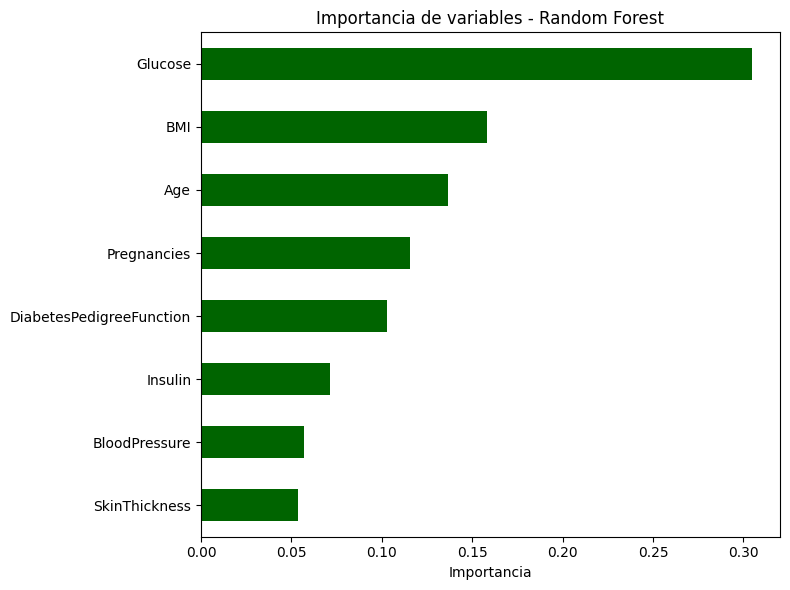

In [33]:
# Extraer importancia de variables del modelo optimizado
importancias = pd.Series(modelo_rf_optimo.feature_importances_, index=X.columns)
importancias = importancias.sort_values(ascending=True)

# Gráfica
plt.figure(figsize=(8, 6))
importancias.plot(kind='barh', color='darkgreen')
plt.title("Importancia de variables - Random Forest")
plt.xlabel("Importancia")
plt.tight_layout()
plt.show()

Conclusión: Las variables con más importancia serán seguramente glucosa, BMI, edad, o presión sanguínea — es una forma visual estupenda de interpretar qué factores están moviendo las predicciones del modelo.

## 10 - Random Forest con class_weight='balanced'

Precisión final (balanced): 0.77

Reporte de clasificación balanceado:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        88
           1       0.61      0.68      0.64        40

    accuracy                           0.77       128
   macro avg       0.73      0.74      0.73       128
weighted avg       0.77      0.77      0.77       128

Matriz de confusión:
 [[71 17]
 [13 27]]


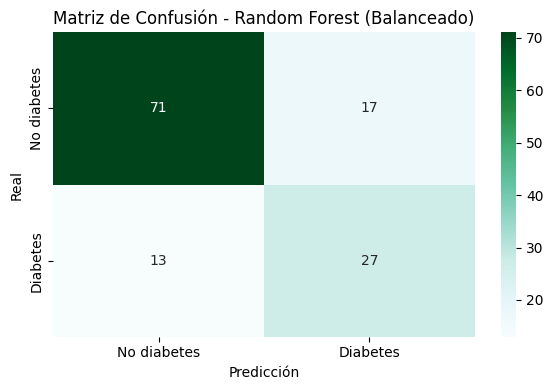

In [34]:
# Entrenamiento del nuevo modelo balanceado
rf_balanceado = RandomForestClassifier(
    n_estimators=grid_search.best_params_['n_estimators'],
    max_depth=grid_search.best_params_['max_depth'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    class_weight='balanced',  # Clave añadida
    random_state=42
)

rf_balanceado.fit(X_train, y_train)
y_pred_balanceado = rf_balanceado.predict(X_test)

# Evaluación del nuevo modelo
print(f"Precisión final (balanced): {accuracy_score(y_test, y_pred_balanceado):.2f}")
print("\nReporte de clasificación balanceado:")
print(classification_report(y_test, y_pred_balanceado, zero_division=0))

# Matriz de confusión
matriz = confusion_matrix(y_test, y_pred_balanceado)

# Mostrar como texto
print("Matriz de confusión:\n", matriz)

# Visualización con heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(matriz, annot=True, fmt='d', cmap='BuGn',
            xticklabels=['No diabetes', 'Diabetes'],
            yticklabels=['No diabetes', 'Diabetes'])
plt.title("Matriz de Confusión - Random Forest (Balanceado)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

## Comparativa y evolución de modelos

### Árbol de Decisión:
- Verdaderos Positivos (TP): 20  
- Verdaderos Negativos (TN): 78  
- Falsos Positivos (FP): 20  
- Falsos Negativos (FN): 10  
- Accuracy: 0.77  
- Modelo simple, rápido, pero con limitaciones al detectar la clase minoritaria.

### Random Forest (sin optimización)
- Mismo comportamiento que el árbol de decisión, con ligera mejora en estabilidad.
- Accuracy: 0.77  
- Sin embargo, aún deja pasar muchos casos de diabetes reales.

### Random Forest con GridSearchCV (Optimización 1)
- Ajuste de hiperparámetros (`n_estimators`, `max_depth`, `min_samples_split`).
- Accuracy: 0.78  
- Recall clase 1: 0.47  
- Mejora leve en rendimiento general, pero aún limitado en detección de positivos.

### Random Forest con `class_weight='balanced'` (Optimización 2)
- Se compensa el desbalance de clases dando más peso a la clase minoritaria.
- Verdaderos Positivos: 27 
- Verdaderos Negativos: 71  
- Falsos Positivos: 13  
- Falsos Negativos: 17  
- Accuracy: 0.77  
- Recall clase 1: 0.68  
- Mejor equilibrio entre sensibilidad y precisión. Detecta más casos reales de diabetes.

### Conclusión: 
De todos los modelos y optimizaciónes, la que mejor resultado dá es Random Forest con class_weight='balanced' porque:
> - Mejora considerablemente el recall de la clase positiva (diabetes).
> - Disminuye los falsos negativos, que son los más críticos en contextos clínicos.
> - Aun con una ligera pérdida de precisión, ofrece un modelo más sensible y robusto.

## 11 - Guardar el modelo final en archivo .pkl

In [35]:
# Crear carpeta si no existe
os.makedirs("models", exist_ok=True)

# Guardar el modelo balanceado
joblib.dump(rf_balanceado, "models/modelo_random_forest_balanceado.pkl")

print("Modelo guardado como modelo_random_forest_balanceado.pkl en la carpeta /models")

Modelo guardado como modelo_random_forest_balanceado.pkl en la carpeta /models


## 12 - Construcción de un modelo Boosting para predicción de diabetes

Precisión del modelo Boosting: 0.80

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        88
           1       0.71      0.60      0.65        40

    accuracy                           0.80       128
   macro avg       0.77      0.74      0.75       128
weighted avg       0.79      0.80      0.79       128



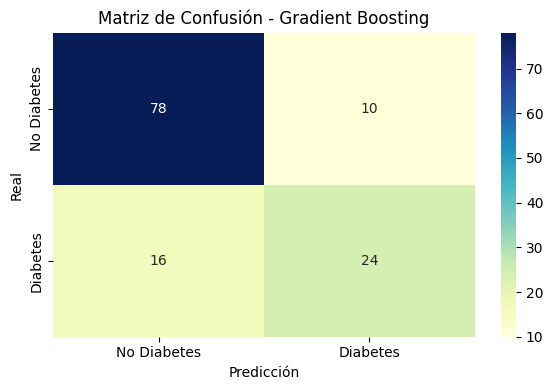

In [ ]:


# Entrenamiento del modelo de boosting
modelo_boost = GradientBoostingClassifier(random_state=42)
modelo_boost.fit(X_train, y_train)

# Predicción
y_pred_boost = modelo_boost.predict(X_test)

# Evaluación
print(f"Precisión del modelo Boosting: {accuracy_score(y_test, y_pred_boost):.2f}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_boost, zero_division=0))

# Matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_boost), annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.title("Matriz de Confusión - Gradient Boosting")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

## Conclusión Final
Tras analizar y comparar distintos modelos para la predicción de diabetes utilizando árboles de decisión, random forest y boosting, llegamos a las siguientes observaciones clave:

### Modelos evaluados

1. **Árbol de Decisión (baseline)**  
   - Accuracy: 0.77  
   - Recall Clase 1 (diabetes): 0.50  
   - F1-score Clase 1: 0.57  
   - Modelo simple, rápido pero con alta tasa de falsos negativos.

2. **Random Forest Optimizado (con GridSearchCV)**  
   - Accuracy: 0.78  
   - Recall Clase 1: 0.47  
   - F1-score Clase 1: 0.58  
   - Ligera mejora general, pero sin cambios relevantes en la clase minoritaria.

3. **Random Forest con class_weight='balanced'**  
   - Accuracy: 0.77  
   - Recall Clase 1: 0.68  
   - F1-score Clase 1: 0.64  
   - Reducción de falsos negativos, ideal si priorizamos detección sensible.

4. **Gradient Boosting (modelo boosting base)**  
   - Accuracy: 0.80  
   - Recall Clase 1: 0.60  
   - F1-score Clase 1: 0.65  
   - Mejor balance global entre precisión, recall y f1-score.


### Análisis comparativo

- **Random Forest con class_weight='balanced'** obtiene el mejor *recall*: es decir, detecta más casos reales de diabetes (TP = 27) que cualquier otro modelo.
- **Gradient Boosting** ofrece el mayor *accuracy* global (80 %) y el mejor equilibrio entre precisión y sensibilidad.
- El **Árbol de decisión** se queda corto en detección de positivos, pero sirve como buena línea base inicial.

### Conclusión final

- Si el objetivo prioritario es detectar la mayor cantidad posible de casos de diabetes (máxima sensibilidad), el mejor modelo es:  
Random Forest con class_weight='balanced'
- Si se busca un modelo con el mejor rendimiento global y métricas equilibradas, el modelo más recomendable es:  
Gradient Boosting

## 13 - Guardar el modelo Boosting en carpeta

In [38]:
# Crear carpeta si no existe
os.makedirs("models", exist_ok=True)

# Guardar el modelo boosting
joblib.dump(modelo_boost, "models/modelo_boosting.pkl")

print("Modelo de Gradient Boosting guardado como modelo_boosting.pkl en la carpeta /models")

Modelo de Gradient Boosting guardado como modelo_boosting.pkl en la carpeta /models
